In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('EEG_data.csv')
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [3]:
df.shape

(12811, 15)

In [4]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln'],
      dtype='object')

In [39]:
# Added timepoint to the data
df_new = df.reset_index().drop(df.index)

for i in range(0,10):
  for j in range(0,10):
    query = "SubjectID == "+str(i)+" & VideoID == "+str(j)
    df_temp = df.query(query)
    df_temp = df_temp.reset_index(drop=True)
    df_temp = df_temp.reset_index()
    df_new = pd.concat([df_new, df_temp])

df_new = df_new.rename(columns={"index": "timepoint"})
df_new = df_new.reset_index(drop=True)

# Change the SubjectID and VideoID columns to integer strings for easy labeling
df_new['SubjectID'] = df_new['SubjectID'].astype(int).astype(str)
df_new['VideoID'] = df_new['VideoID'].astype(int).astype(str)

df_new.head()

,timepoint,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,0,0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,1,0,0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,2,0,0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,3,0,0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,4,0,0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [40]:
# Seperating the dataframe by which the participants marked as confused ('user-definedlabeln' == 1) or understood ('user-definedlabeln' == 0)
df_confused = df_new[df_new['user-definedlabeln'] == 1]
df_understood = df_new[df_new['user-definedlabeln'] == 0]

Average Attention VideoID 1: 43.621428571428574
Average Attention VideoID 2: 43.978873239436616
Average Attention VideoID 5: 49.8130081300813
Average Attention VideoID 6: 33.58620689655172
Average Attention VideoID 8: 55.54838709677419


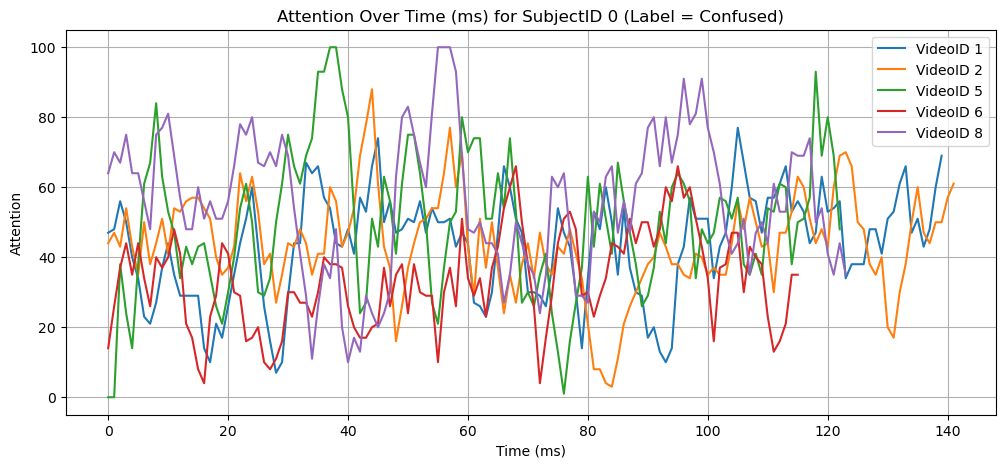

In [46]:
# Plotting the attention over time of Subject 0 for confused videos
plt.figure(figsize=(12, 5)) 
video_ids = df_confused[df_confused['SubjectID'] == '0']['VideoID'].unique()

for i in video_ids:
    df_filtered = df_confused[(df_confused['SubjectID'] == '0') & (df_confused['VideoID'] == i)]
    print('Average Attention', f'VideoID {i}:', df_filtered['Attention'].mean())
    plt.plot(df_filtered['timepoint'], df_filtered['Attention'], label=f'VideoID {i}')

plt.grid(True)
plt.xlabel('Time (ms)')
plt.ylabel('Attention')
plt.title('Attention Over Time (ms) for SubjectID 0 (Label = Confused)')
plt.legend() 
plt.show()

Average Attention VideoID 0: 55.25694444444444
Average Attention VideoID 3: 51.057377049180324
Average Attention VideoID 4: 55.224137931034484
Average Attention VideoID 7: 48.0
Average Attention VideoID 9: 49.9344262295082


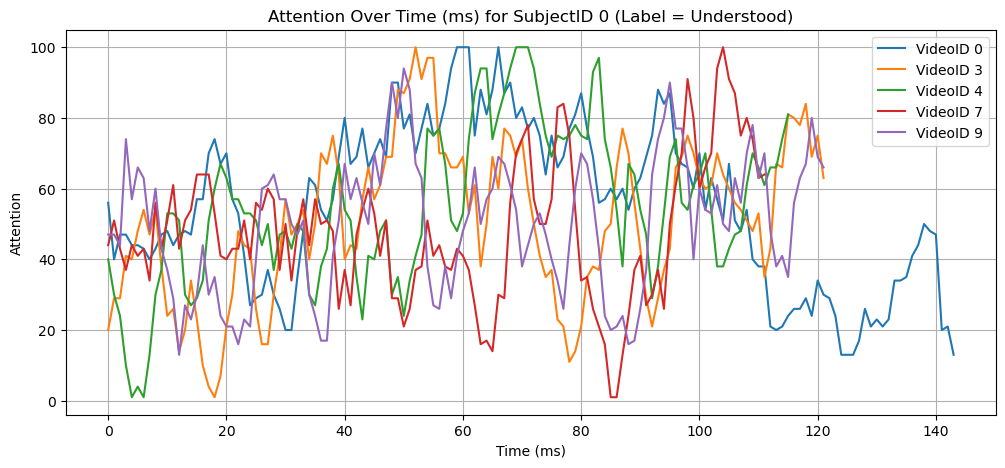

In [47]:
# Plotting the attention over time of Subject 0 for understood videos
plt.figure(figsize=(12, 5)) 
video_ids = df_understood[df_understood['SubjectID'] == '0']['VideoID'].unique()

for i in video_ids:
    df_filtered = df_understood[(df_understood['SubjectID'] == '0') & (df_understood['VideoID'] == i)]
    print('Average Attention', f'VideoID {i}:', df_filtered['Attention'].mean())
    plt.plot(df_filtered['timepoint'], df_filtered['Attention'], label=f'VideoID {i}')

plt.grid(True)
plt.xlabel('Time (ms)')
plt.ylabel('Attention')
plt.title('Attention Over Time (ms) for SubjectID 0 (Label = Understood)')
plt.legend() 
plt.show()

In [50]:
# Seperating the dataframe by which the video marked as difficult ('predefinedlabel' == 1) or easy ('predefinedlabel' == 0)
df_difficult = df_new[df_new['predefinedlabel'] == 1]
df_easy= df_new[df_new['predefinedlabel'] == 0]

Now we look at the videos where the participants were expected to be confused or not confused.

Average Attention VideoID 5: 49.8130081300813
Average Attention VideoID 6: 33.58620689655172
Average Attention VideoID 7: 48.0
Average Attention VideoID 8: 55.54838709677419
Average Attention VideoID 9: 49.9344262295082


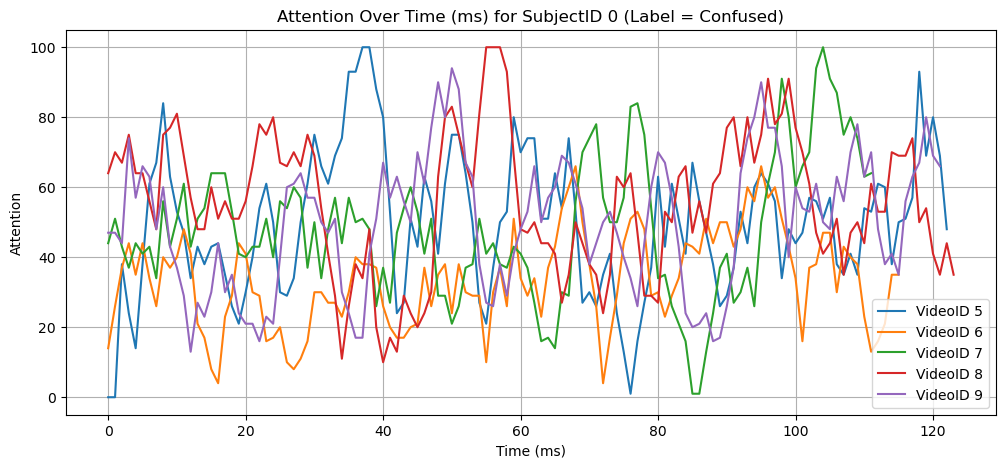

In [53]:
# Plotting the attention over time of Subject 0 for difficult videos
plt.figure(figsize=(12, 5)) 
video_ids = df_difficult[df_difficult['SubjectID'] == '0']['VideoID'].unique()

for i in video_ids:
    df_filtered = df_difficult[(df_difficult['SubjectID'] == '0') & (df_difficult['VideoID'] == i)]
    print('Average Attention', f'VideoID {i}:', df_filtered['Attention'].mean())
    plt.plot(df_filtered['timepoint'], df_filtered['Attention'], label=f'VideoID {i}')

plt.grid(True)
plt.xlabel('Time (ms)')
plt.ylabel('Attention')
plt.title('Attention Over Time (ms) for SubjectID 0 (Label = Difficult)')
plt.legend() 
plt.show()

Average Attention VideoID 0: 55.25694444444444
Average Attention VideoID 1: 43.621428571428574
Average Attention VideoID 2: 43.978873239436616
Average Attention VideoID 3: 51.057377049180324
Average Attention VideoID 4: 55.224137931034484


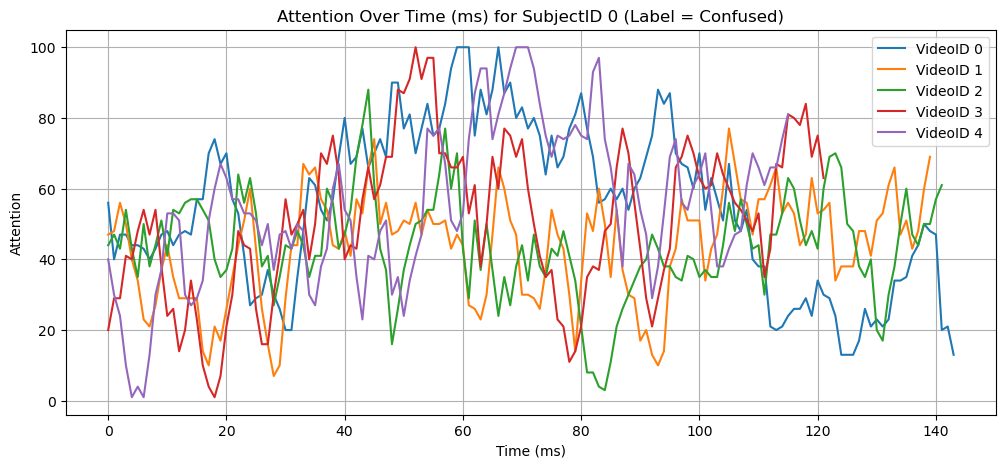

In [54]:
# Plotting the attention over time of Subject 0 for difficult videos
plt.figure(figsize=(12, 5)) 
video_ids = df_easy[df_easy['SubjectID'] == '0']['VideoID'].unique()

for i in video_ids:
    df_filtered = df_easy[(df_easy['SubjectID'] == '0') & (df_easy['VideoID'] == i)]
    print('Average Attention', f'VideoID {i}:', df_filtered['Attention'].mean())
    plt.plot(df_filtered['timepoint'], df_filtered['Attention'], label=f'VideoID {i}')

plt.grid(True)
plt.xlabel('Time (ms)')
plt.ylabel('Attention')
plt.title('Attention Over Time (ms) for SubjectID 0 (Label = Easy)')
plt.legend() 
plt.show()

Looking at both plots for videos that were labeled as confusing compared to videos that were labed as not confusing, we can see that the attention for SubjectID 0 falls off towards the end for the 'easy' videos while the attention stays relatively consistent throughout the entire recording for the 'difficult' videos.